# EDA Tiktok
**Goal**: Perform Exploratory Data Analysis (EDA) on scraped TikTok JSON data

**Context**: This feeds into a "Trend Insights" system for brand + persona development

# Research

## Summary Table: What Defines TikTok “Viral”?

| **Metric/Feature** | **Threshold /Insight** |
| ------------------------------------ |----------------------------------- |
| Views | 100K+ (mild viral), 1M+ (viral), 3–5M in a week (hot viral) |
| Time Window | 72 hours to 8 days—most critical for virality |
| Watch time / Completion Rate | 80% watch, ≥50% completion |
| Timing & Engagement Momentum | Strong within first 4–12 hours, momentum lasts \~2 days |
| Distribution Source | 90%+ from FYP |
| Geographic Reach | Viral in 3+ countries |
| Creator Popularity | Higher follower count = greater viral potential |
| Visual Elements | Close/medium shots, text overlays, first‑person POV |
| Emotional & Social Design (not TikTok specific) | Emotional arousal, share triggers, social identity drive sharing (general virality theory)



## Academic Perspectives
1. Content & Creator Features (Chen Ling et al., 2021)

The paper "Slapping Cats, Bopping Heads, and Oreo Shakes..." used a dataset of 400 TikTok videos and found:

- Most powerful predictor: Creator’s follower count.

- Other influential factors:

  - Shot scale: Close-up or medium shots.

  - Presence of on‑screen text.

  - Point of view choices (e.g., first‑person framing)

They achieved high classification accuracy (AUC = 0.93) in distinguishing viral vs. non-viral

2. Algorithm & Engagement Modeling (Zannettou et al., 2023)

Through data donation (9.2 million recommendations, 347 users):

- Daily TikTok usage time increases over time.

- User attention remains stable (~ 45%).

- Users prefer videos from accounts they follow versus algorithmic recommendations



## Industry Definitions
1. Views & Timeline
- Mildly viral: 100,000 to 250,000 views is considered "mildly viral," often within niche audiences
- Viral: Generally defined as over 1,000,000 views within days or up to two weeks
- "Hot" viral content: Surpassing 3 to 5 million views within 7 days is tagged as some of the highest viral success
- Strict benchmark (2025): TikToks hitting 1 million+ views within 72 hours are labeled “viral”
- Lower-bar view threshold: At least 100,000 views, with true virality often pegged at the 1 million plus mark

2. Engagement Rates & Retention
- Initial traction: Getting 5,000 to 10,000 views soon after posting signals potential virality
- Video watch metrics: Strong viral content often shows:
  - Watch-time over 80%
  - Completion rates above 50% (especially for 15 to 30 second videos)
  - High early engagement within the first 4 hours, often peaking between 6 to 12 hours and momentum continuing into 24 to 48 hours
- For You Page (FYP) traction: Viral videos often receive 90%+ of their views from FYP distribution, signaling algorithmic amplification
- Geographic spread: Reaching audiences in 3 or more countries reflects strong viral behavior

3. Virality “Peak” Metric (Socialinsider)
- Socialinsider’s “virality peak” is the day when view growth slows (less than 3% increase for two consecutive days).
- Their analysis across 4.56 million TikToks (From May 2024 to May 2025) indicates that if a video hasn't gone viral by day 8, the likelihood significantly decreases

## Sources

Academic Sources:
- https://www.researchgate.net/publication/355925066_Slapping_Cats_Bopping_Heads_and_Oreo_Shakes_Understanding_Indicators_of_Virality_in_TikTok_Short_Videos
- https://arxiv.org/abs/2301.04945
- https://arxiv.org/html/2402.13855v2
- https://arxiv.org/abs/2402.00010

Blog Sources:
- https://influensly.com/what-is-considered-viral-on-tiktok/
- https://www.socialinsider.io/blog/tiktok-virality-insights
- https://www.bluehost.com/blog/how-many-views-is-viral/
- https://www.shortsgenerator.ai/blog/what-happens-when-you-go-viral-on-tiktok/
- https://www.csescienceeditor.org/article/will-tiktok-go-viral-in-scholarly-publishing/
- https://tripleareview.com/what-is-considered-viral-on-tiktok/
- https://freshcontentsociety.com/what-makes-a-tik-tok-viral-key-factors-and-strategies-explained/

# Setup

In [115]:
from google.colab import drive
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import pathlib
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

In [116]:
# Uncomment to mount Google Drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/FYP/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/FYP


Convert JSON to Excel

In [117]:
# # Load JSON
# with open("tiktok_general_data.json", "r") as f:
#     data = json.load(f)
# # Convert to DataFrame
# df = pd.DataFrame(data)

#uncomment to convert
# # Save as CSV
# df.to_csv("tiktok_general_data.csv", index=False)

# Load csv
df = pd.read_csv("tiktok_general_with_creator_features.csv")

# Display basic information about the dataset

<u>Summary of Findings (TikTok Sample Data)</u>

**Shape**: (n_rows, ~12–15 columns) – each row represents a TikTok post scraped from the platform.

**Data Types**:
* Mostly numerical (int64) – counts of likes, shares, comments, plays, collections
* Several categorical (object) – author name, music name, text hashtags
* One datetime (datetime64) – createTimeISO (posting timestamp)

**Purpose**: Dataset captures TikTok UGC (user-generated content) metadata, enabling analysis of engagement patterns, viral drivers (hashtags, music, duration), and posting trends over time.

In [118]:
print("Shape:", df.shape)
display(df.head())

Shape: (999, 26)


,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,collectCount,videoMeta.duration,musicMeta.musicName,...,creator_likes_total,creator_videos,creator_verified,distribution_source,watch_time,completion_rate,geographic_reach,close_or_medium_shots,has_text_overlays,first_person_pov
0,https://p16-common-sign-va.tiktokcdn-us.com/to...,yourfavugccreator,forget to switch it off sometimes #fyp #xybca ...,11900,1196,75200,108,980,7,original sound - sxnyxflwr,...,23500000.0,927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,cookie2smoov,#fypシ゚ #relatable #ianjumpp,21000,2357,86200,95,3378,6,Originalton,...,295700000.0,1404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://p16-pu-sign-useast8.tiktokcdn-us.com/t...,lavishh.kk_,It’s ok tho #fyp #relatable #trending #xyzbca ...,137,2,1581,5,17,16,original sound,...,246300.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,ava.fitzgerald33,#SA #brothertrama #fyp #sad #relatable,2108,35,23100,125,218,28,original sound - lyricz,...,49600.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://p16-pu-sign-useast8.tiktokcdn-us.com/t...,julietteweg,#school #relatable #middleschool,26900,621,132000,248,2023,64,original sound,...,211400000.0,1556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Column Description
<u>Author + Content Metadata</u>
* authorMeta.avatar => URL of the creator’s profile picture (JPEG). Useful for identifying the creator visually.

* authorMeta.name => TikTok handle/username of the content creator (yourfavugccreator)

* text => The video’s caption, including hashtags (#fyp #language #relatable) and mentions (@gavin). Important for topic/hashtag analysis.

<u>Engagement Metrics</u>
* diggCount => Number of likes / hearts.

* shareCount => How many times users shared the video.

* playCount => Total number of times the video has been played (views).

* commentCount => Number of comments left on the video.

* collectCount => Number of times users added the video to their personal “favorites/collections.”

<u>Video + Music Metadata</u>
* videoMeta.duration => Length of the video in seconds (7). Short-form content duration is a key variable in engagement analysis.

* musicMeta.musicName => Title of the audio track used (original sound - sxnyxflwr).

* musicMeta.musicAuthor => TikTok username/artist who created the sound (here "່").

* musicMeta.musicOriginal => Boolean (true means it’s an original sound uploaded by the creator, not a reused commercial song).

Music is critical for trend tracking, since trending audio often drives virality.

<u>Others</u>
* createTimeISO => UTC timestamp of when the video was posted (2025-08-29T03:40:28.000Z). Useful for time-series trend analysis (posting cadence, best times to post).

* webVideoUrl => Public URL to the TikTok video (https://www.tiktok.com/...). This allows maybe embedding, dashboard linking, or direct inspection of the post.

<u>Creator Features</u>
* creator_followers => Lifetime number of followers the creator has

* creator_following => How many accounts the creator is following

* creator_likes_total => Lifetime total likes across all videos on the creator’s profile

* creator_videos => Lifetime number of public videos the creator has posted

* creator_verified => Whether the account has the verified badge (boolean)

## Inspect Data Structure

In [119]:
# Info
print(df.info())
print("\nNumber of Features:", df.shape[1])
print("Number of Data Points:", df.shape[0])

zero_nonnull_cols = df.columns[df.isna().all()].tolist()

# Drop them
df.drop(columns=zero_nonnull_cols, inplace=True)

# After cleanup
print("\nAfter dropping empty columns:")
print(df.info())
print("\nNumber of Features:", df.shape[1])
print("Number of Data Points:", df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   authorMeta.avatar        999 non-null    object 
 1   authorMeta.name          999 non-null    object 
 2   text                     984 non-null    object 
 3   diggCount                999 non-null    int64  
 4   shareCount               999 non-null    int64  
 5   playCount                999 non-null    int64  
 6   commentCount             999 non-null    int64  
 7   collectCount             999 non-null    int64  
 8   videoMeta.duration       999 non-null    int64  
 9   musicMeta.musicName      995 non-null    object 
 10  musicMeta.musicAuthor    994 non-null    object 
 11  musicMeta.musicOriginal  999 non-null    bool   
 12  createTimeISO            999 non-null    object 
 13  webVideoUrl              999 non-null    object 
 14  creator_followers        9

In [120]:
# Check missing values
df.isnull().sum()

,0
authorMeta.avatar,0
authorMeta.name,0
text,15
diggCount,0
shareCount,0
playCount,0
commentCount,0
collectCount,0
videoMeta.duration,0
musicMeta.musicName,4


In [121]:
#summary
display(df.describe(include="all").transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
authorMeta.avatar,999,695,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authorMeta.name,999,702,latinkitchen0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,984,745,😭\n\n#fyp #horse #women #storytime \n#crazysto...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diggCount,999.0,NaN,NaN,NaN,1391644.972973,3101262.106014,0.0,14950.0,165800.0,2000000.0,51300000.0
shareCount,999.0,NaN,NaN,NaN,134266.622623,485687.238765,0.0,559.5,10800.0,72000.0,8000000.0
playCount,999.0,NaN,NaN,NaN,16549074.823824,32931402.495105,13.0,235350.0,3500000.0,19550000.0,339900000.0
commentCount,999.0,NaN,NaN,NaN,8828.308308,20648.604998,0.0,180.5,1496.0,8733.5,263200.0
collectCount,999.0,NaN,NaN,NaN,125669.693694,269199.316591,0.0,2042.0,19900.0,178600.0,4300000.0
videoMeta.duration,999.0,NaN,NaN,NaN,70.221221,147.626784,0.0,11.0,23.0,64.0,2251.0
musicMeta.musicName,995,310,original sound,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

**Purpose**: Add useful fields for trend analysis & dashboards

In [122]:
# Convert datetime
df['createTimeISO'] = pd.to_datetime(df['createTimeISO'])

# Extract date parts
df['date'] = df['createTimeISO'].dt.date
df['hour'] = df['createTimeISO'].dt.hour
df['dayofweek'] = df['createTimeISO'].dt.day_name()

# Engagement metrics
df['engagement'] = (
    df['diggCount'] + df['shareCount'] + df['commentCount'] + df['collectCount']
)
df['engagement_rate'] = df['engagement'] / df['playCount']

display(df[['playCount','diggCount','shareCount','commentCount','collectCount','engagement_rate']].head())

,playCount,diggCount,shareCount,commentCount,collectCount,engagement_rate
0,75200,11900,1196,108,980,0.188617
1,86200,21000,2357,95,3378,0.311253
2,1581,137,2,5,17,0.101834
3,23100,2108,35,125,218,0.107619
4,132000,26900,621,248,2023,0.225697


# Analysis on what videos are viral

flags the word “viral” (case-insensitive) in captions, hashtags, comments, then summarizes & plots drivers (hashtags, duration bands, posting time).

understanding whether adding keywords in captions, hashtags & comments makes videos more likely to go viral

## Helpers

In [123]:
# KEYWORDS = [
#     "viral", "trending", "giveaway", "review", "asmr",
#     "aesthetic", "storytime", "tutorial", "unboxing", "grwm"
# ]
KEYWORDS = [
    "viral", "trending"
]
KEYWORDS = [k.strip().lower() for k in KEYWORDS if k.strip()]

In [124]:
def parse_json_if_needed(x):
    if isinstance(x, str) and (x.strip().startswith("[") or x.strip().startswith("{")):
        try:
            import json
            return json.loads(x)
        except Exception:
            return x
    return x

def extract_hashtags_from_caption(text: str):
    if not isinstance(text, str):
        return []
    return [h[1:].lower() for h in re.findall(r"#\w+", text)]

def get_structured_hashtags(row: dict):
    tags = set()
    candidate_cols = [
        "hashtags", "hashTags", "tagList", "challenges",
        "video.hashtags", "videoMeta.hashtags", "descHashtags"
    ]
    for c in candidate_cols:
        if c in row:
            val = parse_json_if_needed(row[c])
            if isinstance(val, list):
                for item in val:
                    if isinstance(item, dict):
                        for k in ("name", "title", "tag", "challengeName"):
                            v = item.get(k)
                            if isinstance(v, str) and v.strip():
                                tags.add(v.strip().lower())
            elif isinstance(val, str):
                for piece in re.split(r"[,\s]+", val):
                    if piece:
                        tags.add(piece.strip().lower().lstrip("#"))
    return sorted(tags)

def get_comment_texts(row: dict):
    texts = []
    candidate_cols = [
        "comments", "commentList", "topComments",
        "comments.list", "comments.data", "comment.data",
        "comment.details", "comments.items"
    ]
    for c in candidate_cols:
        if c in row:
            val = parse_json_if_needed(row[c])
            if isinstance(val, list):
                for it in val:
                    if isinstance(it, dict):
                        for k in ("text", "comment", "content", "commentText"):
                            v = it.get(k)
                            if isinstance(v, str):
                                texts.append(v)
    return texts

def find_keywords_in_text(text: str, keywords):
    """Return set of keywords found in text as whole words (case-insensitive).
       Supports multi-word phrases."""
    found = set()
    if not isinstance(text, str):
        return found
    for kw in keywords:
        pat = r"(?i)(?<!\w)" + re.escape(kw).replace(r"\ ", r"\s+") + r"(?!\w)"
        if re.search(pat, text):
            found.add(kw)
    return found

def union_sets(series):
    out = set()
    for v in series:
        if isinstance(v, set):
            out |= v
        elif isinstance(v, list):
            out |= set(v)
    return out

In [125]:
# # check if expected columns exist
# for col in [
#     "text","musicMeta.musicName","musicMeta.musicAuthor","musicMeta.musicOriginal",
#     "videoMeta.duration","webVideoUrl"
# ]:
#     if col not in df.columns:
#         df[col] = np.nan

In [126]:
# Get hashtag fields (caption + structured)
df["caption_hashtags"] = df["text"].apply(extract_hashtags_from_caption)

structured_tags_series = []
comment_texts_series = []
for row in df.to_dict("records"):
    structured_tags_series.append(get_structured_hashtags(row))
    comment_texts_series.append(get_comment_texts(row))

df["structured_hashtags"] = structured_tags_series
df["all_hashtags"] = (df["caption_hashtags"] + df["structured_hashtags"]).apply(lambda lst: sorted(set(lst)))

In [127]:
# Match keyword by source
# Caption text
df["kw_caption"] = df["text"].apply(lambda t: find_keywords_in_text(t, KEYWORDS))

# Hashtags: match exact tag to keyword or keyword without spaces (for phrases)
kw_forms = {kw: {kw, kw.replace(" ", "")} for kw in KEYWORDS}
def find_keywords_in_hashtags(tags):
    tags = set((tags or []))
    tags = {str(t).lower().lstrip("#") for t in tags if isinstance(t, (str,))}
    found = set()
    for kw, forms in kw_forms.items():
        if tags & forms:
            found.add(kw)
    return found
df["kw_hashtag"] = df["all_hashtags"].apply(find_keywords_in_hashtags)

# Comments
df["kw_comment"] = [
    union_sets([find_keywords_in_text(t, KEYWORDS) for t in texts])
    for texts in comment_texts_series
]

# Any source
df["kw_any"] = [
    union_sets([a, b, c]) for a, b, c in zip(df["kw_caption"], df["kw_hashtag"], df["kw_comment"])
]
df["has_kw_any"] = df["kw_any"].apply(lambda s: len(s) > 0)

In [128]:
# Aggregate for each video (latest metrics / union of keyword sets)
def first_non_null(series):
    for v in series:
        if pd.notna(v):
            return v
    return np.nan

def union_lists_or_sets(series):
    return sorted(union_sets(series))

if "webVideoUrl" in df.columns and df["webVideoUrl"].notna().any():
    g = (df.groupby("webVideoUrl", dropna=False)
           .agg({
               "createTimeISO": "min",
               "authorMeta.name": first_non_null,
               "text": first_non_null,
               "musicMeta.musicName": first_non_null,
               "musicMeta.musicAuthor": first_non_null,
               "musicMeta.musicOriginal": "max",
               "videoMeta.duration": "max",
               "diggCount": "max",
               "shareCount": "max",
               "commentCount": "max",
               "collectCount": "max",
               "playCount": "max",
               "engagement": "max",
               "engagement_rate": "max",
               "kw_caption": union_lists_or_sets,
               "kw_hashtag": union_lists_or_sets,
               "kw_comment": union_lists_or_sets,
               "kw_any": union_lists_or_sets
           })
           .reset_index())
else:
    g = df.copy()

In [129]:
# stats (count, median/p90 ER, duration, original sound)
rows = []
for kw in KEYWORDS:
    mask = g["kw_any"].apply(lambda s: kw in set(s if isinstance(s, (list, set)) else []))
    sub = g[mask]
    rows.append({
        "keyword": kw,
        "videos": int(len(sub)),
        "median_engagement_rate": float(np.nanmedian(sub["engagement_rate"])) if len(sub) else np.nan,
        "p90_engagement_rate": float(np.nanpercentile(sub["engagement_rate"].dropna(), 90)) if sub["engagement_rate"].notna().any() else np.nan,
        "median_plays": float(np.nanmedian(sub["playCount"])) if len(sub) else np.nan,
        "median_duration_s": float(np.nanmedian(sub["videoMeta.duration"])) if len(sub) else np.nan,
        "pct_original_sound": float(np.nanmean(sub["musicMeta.musicOriginal"])) if len(sub) else np.nan
    })

kw_stats = pd.DataFrame(rows).sort_values(["videos","median_engagement_rate"], ascending=[False, False])
print("Per-keyword stats (sorted):")
display(kw_stats)


Per-keyword stats (sorted):


,keyword,videos,median_engagement_rate,p90_engagement_rate,median_plays,median_duration_s,pct_original_sound
0,viral,240,0.147393,0.251397,6050000.0,17.5,0.704167
1,trending,113,0.131816,0.248917,3600000.0,15.0,0.734513


In [130]:
# Top co-occurring hashtags per keyword (besides the keyword itself)
def co_hashtags_for_keyword(kw, topn=15):
    mask = g["kw_any"].apply(lambda s: kw in set(s if isinstance(s, (list, set)) else []))
    urls = set(g[mask]["webVideoUrl"].dropna()) if "webVideoUrl" in g.columns else set(g[mask].index)
    # take the first occurrence per video from original df to read hashtags
    first_rows = df.sort_values("createTimeISO").drop_duplicates("webVideoUrl", keep="last") if "webVideoUrl" in df.columns else df
    co = Counter()
    for _, r in first_rows.iterrows():
        id_ = r.get("webVideoUrl") if "webVideoUrl" in df.columns else _
        if id_ in urls:
            tags = set((r.get("caption_hashtags") or [])) | set((r.get("structured_hashtags") or []))
            tags = {t for t in tags if t and t not in kw_forms[kw]}
            co.update(tags)
    return co.most_common(topn)

# Example: print top 10 co-tags for the top 3 keywords by video count
for kw in kw_stats.head(3)["keyword"]:
    print(f"\nTop co-occurring hashtags for '{kw}':")
    for tag, cnt in co_hashtags_for_keyword(kw, topn=10):
        print(f"  {tag}: {cnt}")


Top co-occurring hashtags for 'viral':
  fyp: 169
  foryou: 93
  trending: 62
  fypシ: 59
  foryoupage: 57
  relatable: 52
  viralvideo: 25
  funny: 23
  real: 19
  blowthisup: 18

Top co-occurring hashtags for 'trending':
  fyp: 82
  viral: 58
  foryou: 36
  foryoupage: 32
  fypシ: 24
  relatable: 15
  viralvideo: 11
  funny: 11
  trend: 10
  xyzbca: 7


In [131]:
# KEYWORDS = [
#     "viral", "trending", "giveaway", "review", "asmr",
#     "aesthetic", "storytime", "tutorial", "unboxing", "grwm"
# ]
# Update keywords
KEYWORDS = [
    "viral", "trending", "fyp", "foryou", "relatable", "funny"
]
KEYWORDS = [k.strip().lower() for k in KEYWORDS if k.strip()]

## Comparison Analysis of videos with and without keywords

In [132]:
def _row_is_viral(row):
    is_kw = False
    if "kw_any" in row.index:
        val = row["kw_any"]
        if isinstance(val, (list, set)):
            is_kw = ("viral" in set(v.lower() for v in val if isinstance(v, str)))

    flags = []
    for c in ["has_viral_any", "has_viral_caption", "has_viral_hashtag", "has_viral_comment"]:
        if c in row.index:
            try:
                flags.append(bool(row[c]))
            except Exception:
                flags.append(False)

    return bool(is_kw or any(flags))

g["isViral"] = g.apply(_row_is_viral, axis=1)

print("Videos total:", len(g))
print("Viral (contains 'viral' in caption/hashtags/comments):", int(g["isViral"].sum()))
print("Non-viral:", int((~g["isViral"]).sum()))

Videos total: 774
Viral (contains 'viral' in caption/hashtags/comments): 240
Non-viral: 534


In [133]:
# Numeric stats comparison
num_cols = [
    "diggCount","shareCount","playCount","commentCount","collectCount",
    "videoMeta.duration","engagement","engagement_rate"
]
present_num_cols = [c for c in num_cols if c in g.columns]

def p90(x):
    x = pd.to_numeric(x, errors="coerce")
    return x.quantile(0.90)

# Compute summary
summary_wide = (
    g.groupby("isViral")[present_num_cols]
     .agg(["count","median","mean","std", p90])
     .rename(columns={"p90": "p90"})
)

# wide table without truncation
with pd.option_context(
    "display.max_columns", None,
    "display.width", None,
    "display.max_colwidth", None,
    "display.expand_frame_repr", True
):
    print("\n=== Numeric comparison: Viral vs Non-Viral (Wide) ===")
    display(summary_wide)

# # tidy version
# summary_long = (
#     summary_wide
#         .stack(level=0)
#         .reset_index()
#         .rename(columns={"level_1": "metric"})
#         .loc[:, ["isViral","metric","count","median","mean","std","p90"]]
#         .sort_values(["isViral","metric"])
# )

# print("\n=== Numeric comparison: Viral vs Non-Viral (Tidy) ===")
# display(summary_long)


=== Numeric comparison: Viral vs Non-Viral (Wide) ===


diggCount                                                  shareCount  \
            count    median          mean           std        p90      count   
isViral                                                                         
False         534  133250.0  1.242971e+06  3.392495e+06  3770000.0        534   
True          240  559900.0  1.731817e+06  2.985715e+06  4600000.0        240   

                                                         playCount             \
          median           mean            std       p90     count     median   
isViral                                                                         
False     6123.0   91878.953184  414385.677330  166290.0       534  2400000.0   
True     24650.0  181832.783333  536454.826553  338650.0       240  6050000.0   

                                                commentCount          \
                 mean           std         p90        count  median   
isViral                                                                
False    1.392269e+07  3.264086e+07  38670000.0          534  1068.0   
True     1.949760e+07  3.473879e+07  52850000.0          240  2987.5   

                                             collectCount           \
                 mean           std      p90        count   median   
isViral                                                              
False     7375.022472  19193.279510  18950.0          534  14800.0   
True     10917.820833  21894.309782  25910.0          240  52700.0   

                                                videoMeta.duration         \
                  mean            std       p90              count median   
isViral                                                                     
False    107007.528090  269745.326660  323880.0                534   23.0   
True     154629.770833  264567.632409  374190.0                240   17.5   

                                      engagement                          \
              mean         std    p90      count    median          mean   
isViral                                                                    
False    68.204120  162.043104  172.8        534  161549.5  1.449232e+06   
True     44.733333   71.565604   92.3        240  645951.5  2.079198e+06   

                                 engagement_rate                      \
                  std        p90           count    median      mean   
isViral                                                                
False    4.001578e+06  4202450.0             534  0.104928  0.118565   
True     3.575202e+06  5263932.4             240  0.147393  0.149486   

                             
              std       p90  
isViral                      
False    0.089216  0.242254  
True     0.082144  0.251397

In [134]:
# Categorical comparisons: top authors & top music per segment
def top_values(df_in, col, topn=10):
    if col not in df_in.columns:
        return pd.DataFrame(columns=[col, "videos"])
    s = (df_in[col]
         .astype("string")
         .str.strip()
         .replace({"": pd.NA})
         .dropna())
    vc = s.value_counts().head(topn)
    out = vc.reset_index(name="videos").rename(columns={"index": col})
    return out

viral_tbl    = g[g["isViral"] == True]
nonviral_tbl = g[g["isViral"] == False]

top_authors_viral    = top_values(viral_tbl, "authorMeta.name", topn=10)
top_authors_nonviral = top_values(nonviral_tbl, "authorMeta.name", topn=10)
top_music_viral      = top_values(viral_tbl, "musicMeta.musicName", topn=10)
top_music_nonviral   = top_values(nonviral_tbl, "musicMeta.musicName", topn=10)

print("\n=== Top Authors — Viral ===")
display(top_authors_viral)
print("\n=== Top Authors — Non-Viral ===")
display(top_authors_nonviral)

print("\n=== Top Music — Viral ===")
display(top_music_viral)
print("\n=== Top Music — Non-Viral ===")
display(top_music_nonviral)


=== Top Authors — Viral ===


,authorMeta.name,videos
0,52timizhuo,4
1,briannaguidryy,3
2,eleanorduncan34,3
3,dada_ahoufe_,2
4,akhsulie,2
5,jeremie_kk,2
6,el.edgarcito,2
7,mr.real586,2
8,lifetips669,2
9,syl_foisy,2



=== Top Authors — Non-Viral ===


,authorMeta.name,videos
0,foryou_foodlover,5
1,lifeprettyhacks,5
2,camrbsn,4
3,cookie2smoov,4
4,gladissahm,3
5,jenaklina,3
6,yana_kimber,3
7,latinkitchen0,3
8,mazin3x,3
9,lalifehacks,3



=== Top Music — Viral ===


,musicMeta.musicName,videos
0,original sound,120
1,sonido original,6
2,som original,5
3,see you in heaven,4
4,nhạc nền - fyp,4
5,Mysterious and sad BGM(1120058),2
6,"Ocarina Of Time Theme (From ""The Legend Of Zel...",2
7,orijinal ses,2
8,Originalton,2
9,My Love Mine All Mine,2



=== Top Music — Non-Viral ===


,musicMeta.musicName,videos
0,original sound,221
1,Originalton,14
2,sonido original,10
3,Shake It To The Max (FLY) (Remix),9
4,son original,7
5,Love You So,6
6,Pretty Little Baby,4
7,Goddamn Jimmy this is some serious gourmet shit,4
8,QKThr,4
9,som original,4


In [135]:
# # bar charts
# metrics_to_plot = [m for m in ["engagement_rate","playCount","diggCount","shareCount","commentCount","collectCount","videoMeta.duration"] if m in present_num_cols]

# for m in metrics_to_plot:
#     med = g.groupby("isViral")[m].median()
#     plt.figure(figsize=(6,4))
#     plt.bar(["Non-Viral","Viral"], [float(med.get(False, np.nan)), float(med.get(True, np.nan))])
#     plt.title(f"Median {m} by Segment")
#     plt.xlabel("Segment")
#     plt.ylabel(m)
#     plt.tight_layout()
#     plt.show()

## Summary of findings

Videos that mention keywords (esp. “viral”) in captions/hashtags/comments seems to be correlated with higher performance.

Comparing median values for isViral = True vs False:
- Engagement rate: 0.1474 vs 0.1049 → ~+40% relative uplift.
- Plays: 6.05M vs 2.40M → ~2.5× higher.
- Likes (diggCount): 559.9k vs 133.3k → ~4.2× higher.
- Shares: 24.7k vs 6.1k → ~4.0× higher.
- Comments: 2,988 vs 1,068 → ~2.8× higher.
- Collections: 52.7k vs 14.8k → ~3.6× higher.
- Duration: 17.5s vs 23.0s → “viral” mention videos are ~24% shorter on median.

# Analysis on whether creator features determine virality

understanding whether creator features make videos more likely to go viral

In [136]:
# handle strings like 1.2e6 etc.
creator_num = ["creator_followers","creator_following","creator_likes_total","creator_videos"]
for c in creator_num:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")


## Helpers

In [137]:
def _safe_corr(x, y, fn):
    x = pd.to_numeric(x, errors="coerce")
    y = pd.to_numeric(y, errors="coerce")
    m = x.notna() & y.notna()
    xv, yv = x[m], y[m]
    if len(xv) < 3 or xv.nunique(dropna=True) < 2 or yv.nunique(dropna=True) < 2:
        return np.nan
    try:
        return fn(xv, yv)[0]
    except Exception:
        return np.nan

def _log1p(s):
    s = pd.to_numeric(s, errors="coerce")
    return np.log1p(s.clip(lower=0))

## Correlation Tables

In [138]:
metrics = [c for c in ["diggCount","shareCount","playCount","commentCount","collectCount","engagement","engagement_rate"] if c in df.columns]
features = [c for c in creator_num if c in df.columns]

rows = []
rows_log = []
for feat in features:
    for m in metrics:
        rows.append({
            "feature": feat,
            "metric": m,
            "pearson":  _safe_corr(df[feat], df[m], pearsonr),
            "spearman": _safe_corr(df[feat], df[m], spearmanr),
            "n_pairs": int((df[feat].notna() & df[m].notna()).sum())
        })
        # log1p correlations (except for engagement_rate which can be <=0)
        if m != "engagement_rate":
            rows_log.append({
                "feature": feat,
                "metric": m,
                "pearson_log1p":  _safe_corr(_log1p(df[feat]), _log1p(df[m]), pearsonr),
                "spearman_log1p": _safe_corr(_log1p(df[feat]), _log1p(df[m]), spearmanr),
                "n_pairs": int((df[feat].notna() & df[m].notna()).sum())
            })

corr_raw = pd.DataFrame(rows).sort_values(["feature","metric"]).reset_index(drop=True)
corr_log = pd.DataFrame(rows_log).sort_values(["feature","metric"]).reset_index(drop=True)

print("=== Correlations (raw values) ===")
display(corr_raw)

print("=== Correlations (log1p-transformed counts) ===")
display(corr_log)

=== Correlations (raw values) ===


,feature,metric,pearson,spearman,n_pairs
0,creator_followers,collectCount,0.158818,0.346157,991
1,creator_followers,commentCount,0.328052,0.390180,991
2,creator_followers,diggCount,0.306918,0.380429,991
3,creator_followers,engagement,0.291214,0.379335,991
4,creator_followers,engagement_rate,-0.080217,-0.213886,991
5,creator_followers,playCount,0.423065,0.453013,991
6,creator_followers,shareCount,0.136722,0.305630,991
7,creator_following,collectCount,-0.069359,0.024836,935
8,creator_following,commentCount,-0.052952,0.027385,935
9,creator_following,diggCount,-0.055882,0.052152,935


=== Correlations (log1p-transformed counts) ===


,feature,metric,pearson_log1p,spearman_log1p,n_pairs
0,creator_followers,collectCount,0.350566,0.346157,991
1,creator_followers,commentCount,0.425773,0.390180,991
2,creator_followers,diggCount,0.388828,0.380429,991
3,creator_followers,engagement,0.385361,0.379335,991
4,creator_followers,playCount,0.443011,0.453013,991
5,creator_followers,shareCount,0.324852,0.305630,991
6,creator_following,collectCount,-0.001072,0.024836,935
7,creator_following,commentCount,0.008609,0.027385,935
8,creator_following,diggCount,0.028039,0.052152,935
9,creator_following,engagement,0.020512,0.045167,935


## Quantile bin

Determine if higher numbers for creator features lead to higher KPIs

In [139]:
def quantile_bins(s, q=5):
    s = pd.to_numeric(s, errors="coerce")
    # dropna for quantiling; duplicates='drop' to handle low cardinality
    try:
        b = pd.qcut(s.dropna(), q=q, duplicates="drop")
    except ValueError:
        # fall back to 3 bins if not enough unique values
        try:
            b = pd.qcut(s.dropna(), q=3, duplicates="drop")
        except Exception:
            return None
    out = pd.Series(pd.NA, index=s.index, dtype="object")
    out.loc[b.index] = b.astype(str)
    return out

bin_tables = {}
for feat in features:
    bins = quantile_bins(df[feat], q=5)
    if bins is None or bins.isna().all():
        continue
    tmp = df.assign(_bin=bins)
    g = (tmp.dropna(subset=["_bin"])
           .groupby("_bin")[metrics]
           .agg(["count","median","mean","std"])
           .sort_index())
    bin_tables[feat] = g
    print(f"\n=== Quantile-bin KPI summary for {feat} ===")
    display(g)



=== Quantile-bin KPI summary for creator_followers ===


diggCount                                         \
                            count     median          mean           std   
_bin                                                                       
(10500.0, 76600.0]            198   107800.0  9.764352e+05  1.687004e+06   
(1400000.0, 93400000.0]       193  1800000.0  2.665905e+06  3.794152e+06   
(334500.0, 1400000.0]         203   167200.0  1.243245e+06  2.026424e+06   
(4.999, 10500.0]              199    21800.0  3.111288e+05  7.290144e+05   
(76600.0, 334500.0]           198   270050.0  1.816183e+06  4.863669e+06   

                        shareCount                                         \
                             count   median           mean            std   
_bin                                                                        
(10500.0, 76600.0]             198   5713.0  115940.969697  378436.227760   
(1400000.0, 93400000.0]        193  49500.0  261064.051813  686258.639669   
(334500.0, 1400000.0]          203  11100.0   88006.374384  233076.865975   
(4.999, 10500.0]               199   1245.0   69891.552764  225948.154682   
(76600.0, 334500.0]            198  21600.0  143303.166667  679256.096482   

                        playCount              ...   collectCount  \
                            count      median  ...           mean   
_bin                                           ...                  
(10500.0, 76600.0]            198   2200000.0  ...   89144.671717   
(1400000.0, 93400000.0]       193  24200000.0  ...  229663.715026   
(334500.0, 1400000.0]         203   3600000.0  ...  114080.866995   
(4.999, 10500.0]              199    206200.0  ...   28257.321608   
(76600.0, 334500.0]           198   6900000.0  ...  173358.722222   

                                       engagement                           \
                                   std      count     median          mean   
_bin                                                                         
(10500.0, 76600.0]       148592.505203        198   140476.0  1.187856e+06   
(1400000.0, 93400000.0]  344539.424794        193  2101866.0  3.177108e+06   
(334500.0, 1400000.0]    192609.388292        203   212197.0  1.452505e+06   
(4.999, 10500.0]          58980.351894        199    29874.0  4.118584e+05   
(76600.0, 334500.0]      403602.894516        198   345363.5  2.140984e+06   

                                      engagement_rate                      \
                                  std           count    median      mean   
_bin                                                                        
(10500.0, 76600.0]       2.060327e+06             198  0.141923  0.137352   
(1400000.0, 93400000.0]  4.282759e+06             193  0.084525  0.094919   
(334500.0, 1400000.0]    2.331727e+06             203  0.094917  0.115065   
(4.999, 10500.0]         9.605277e+05             199  0.167052  0.161035   
(76600.0, 334500.0]      5.896190e+06             198  0.088941  0.104705   

                                   
                              std  
_bin                               
(10500.0, 76600.0]       0.096175  
(1400000.0, 93400000.0]  0.060328  
(334500.0, 1400000.0]    0.086192  
(4.999, 10500.0]         0.100158  
(76600.0, 334500.0]      0.078146  

[5 rows x 28 columns]


=== Quantile-bin KPI summary for creator_following ===


diggCount                                       shareCount  \
                    count    median          mean           std      count   
_bin                                                                         
(0.999, 10.0]         193   83500.0  1.018597e+06  1.987499e+06        193   
(10.0, 59.6]          181  289500.0  1.754753e+06  3.769836e+06        181   
(175.0, 470.4]        186  209500.0  1.417466e+06  2.251071e+06        186   
(470.4, 9822.0]       187  150300.0  1.431023e+06  3.080726e+06        187   
(59.6, 175.0]         188  251800.0  1.441839e+06  4.104239e+06        188   

                                                       playCount             \
                  median           mean            std     count     median   
_bin                                                                          
(0.999, 10.0]    11100.0   66668.129534  211853.783272       193  3000000.0   
(10.0, 59.6]     19900.0  141230.392265  311257.459862       181  7500000.0   
(175.0, 470.4]    7275.5  220880.037634  718141.506534       186  2550000.0   
(470.4, 9822.0]   5579.0  101712.299465  402239.947349       187  2600000.0   
(59.6, 175.0]    27500.0  142204.920213  607693.713559       188  3700000.0   

                 ...   collectCount                engagement            \
                 ...           mean            std      count    median   
_bin             ...                                                      
(0.999, 10.0]    ...   96711.031088  183480.193168        193  134943.0   
(10.0, 59.6]     ...  157007.552486  289662.360616        181  429941.0   
(175.0, 470.4]   ...  117840.897849  179006.013763        186  245242.5   
(470.4, 9822.0]  ...  110622.834225  215875.915121        187  175733.0   
(59.6, 175.0]    ...  159554.409574  424527.862437        188  343070.0   

                                            engagement_rate            \
                         mean           std           count    median   
_bin                                                                    
(0.999, 10.0]    1.187495e+06  2.268942e+06             193  0.047979   
(10.0, 59.6]     2.063105e+06  4.201213e+06             181  0.116742   
(175.0, 470.4]   1.769165e+06  2.719675e+06             186  0.143178   
(470.4, 9822.0]  1.650922e+06  3.625933e+06             187  0.121475   
(59.6, 175.0]    1.752138e+06  5.065941e+06             188  0.134541   

                                     
                     mean       std  
_bin                                 
(0.999, 10.0]    0.083300  0.081261  
(10.0, 59.6]     0.126693  0.086455  
(175.0, 470.4]   0.147799  0.082054  
(470.4, 9822.0]  0.132922  0.093877  
(59.6, 175.0]    0.129058  0.081978  

[5 rows x 28 columns]


=== Quantile-bin KPI summary for creator_likes_total ===


diggCount                                         \
                               count     median          mean           std   
_bin                                                                          
(12400000.0, 45400000.0]         192   542800.0  2.024697e+06  3.585411e+06   
(3000000.0, 12400000.0]          203   259800.0  1.462241e+06  1.986190e+06   
(45400000.0, 2400000000.0]       198  2300000.0  3.042898e+06  5.054256e+06   
(472000.0, 3000000.0]            199    81400.0  4.195595e+05  6.742268e+05   
(656.999, 472000.0]              199    11000.0  5.119802e+04  8.115893e+04   

                           shareCount                                         \
                                count   median           mean            std   
_bin                                                                           
(12400000.0, 45400000.0]          192  21800.0  140894.770833  463367.039614   
(3000000.0, 12400000.0]           203  33800.0  156215.724138  382999.443900   
(45400000.0, 2400000000.0]        198  49500.0  299724.878788  858933.946756   
(472000.0, 3000000.0]             199   5378.0   71946.402010  218269.504051   
(656.999, 472000.0]               199    506.0    5341.537688   13294.336227   

                           playCount              ...   collectCount  \
                               count      median  ...           mean   
_bin                                              ...                  
(12400000.0, 45400000.0]         192   7800000.0  ...  201795.046875   
(3000000.0, 12400000.0]          203   6700000.0  ...  131721.669951   
(45400000.0, 2400000000.0]       198  21150000.0  ...  250062.803030   
(472000.0, 3000000.0]            199   1700000.0  ...   42870.924623   
(656.999, 472000.0]              199    231000.0  ...    7811.532663   

                                          engagement                           \
                                      std      count     median          mean   
_bin                                                                            
(12400000.0, 45400000.0]    303176.632650        192   633652.0  2.376565e+06   
(3000000.0, 12400000.0]     173334.879282        203   337095.0  1.759332e+06   
(45400000.0, 2400000000.0]  446682.096475        198  2831907.0  3.613946e+06   
(472000.0, 3000000.0]        65803.832659        199    98917.0  5.383265e+05   
(656.999, 472000.0]          12445.818642        199    15818.0  6.521288e+04   

                                         engagement_rate                      \
                                     std           count    median      mean   
_bin                                                                           
(12400000.0, 45400000.0]    4.214130e+06             192  0.117517  0.123187   
(3000000.0, 12400000.0]     2.364966e+06             203  0.119480  0.125082   
(45400000.0, 2400000000.0]  5.979731e+06             198  0.121475  0.129881   
(472000.0, 3000000.0]       8.976251e+05             199  0.092654  0.122490   
(656.999, 472000.0]         1.008145e+05             199  0.074131  0.113142   

                                      
                                 std  
_bin                                  
(12400000.0, 45400000.0]    0.079101  
(3000000.0, 12400000.0]     0.087285  
(45400000.0, 2400000000.0]  0.068766  
(472000.0, 3000000.0]       0.100769  
(656.999, 472000.0]         0.102124  

[5 rows x 28 columns]


=== Quantile-bin KPI summary for creator_videos ===


diggCount                                       shareCount  \
                     count    median          mean           std      count   
_bin                                                                          
(0.999, 54.0]          201   83500.0  1.280861e+06  4.275110e+06        201   
(174.0, 445.0]         200  172250.0  1.889887e+06  3.732238e+06        200   
(445.0, 966.4]         193  197500.0  1.060208e+06  1.791927e+06        193   
(54.0, 174.0]          198  247950.0  1.548848e+06  2.983473e+06        198   
(966.4, 31100.0]       198  237800.0  1.185866e+06  1.822235e+06        198   

                                                        playCount             \
                   median           mean            std     count     median   
_bin                                                                           
(0.999, 54.0]      5452.0  148736.049751  618721.378189       201  1100000.0   
(174.0, 445.0]    18100.0   89966.065000  260344.057495       200  3750000.0   
(445.0, 966.4]    11500.0   72770.347150  198345.181745       193  4100000.0   
(54.0, 174.0]     12100.0  157395.095960  524530.814561       198  4150000.0   
(966.4, 31100.0]  14750.0  203886.611111  641253.365576       198  3800000.0   

                  ...   collectCount                engagement            \
                  ...           mean            std      count    median   
_bin              ...                                                      
(0.999, 54.0]     ...  117333.318408  373934.920858        201  133605.0   
(174.0, 445.0]    ...  146677.450000  233349.369107        200  226287.0   
(445.0, 966.4]    ...  123406.813472  309341.613920        193  261004.0   
(54.0, 174.0]     ...  144992.757576  227488.401989        198  310485.5   
(966.4, 31100.0]  ...   99018.808081  150057.204663        198  296925.5   

                                             engagement_rate            \
                          mean           std           count    median   
_bin                                                                     
(0.999, 54.0]     1.553595e+06  5.195796e+06             201  0.155800   
(174.0, 445.0]    2.137379e+06  4.111890e+06             200  0.111859   
(445.0, 966.4]    1.263496e+06  2.187471e+06             193  0.073706   
(54.0, 174.0]     1.859398e+06  3.595872e+06             198  0.121346   
(966.4, 31100.0]  1.500330e+06  2.272770e+06             198  0.091394   

                                      
                      mean       std  
_bin                                  
(0.999, 54.0]     0.153878  0.090136  
(174.0, 445.0]    0.117478  0.083153  
(445.0, 966.4]    0.102283  0.086381  
(54.0, 174.0]     0.128230  0.091139  
(966.4, 31100.0]  0.110579  0.083648  

[5 rows x 28 columns]

## Verified vs non-verified comparison

In [140]:
if "creator_verified" in df.columns:
    ver = df["creator_verified"].fillna(False)
    verified_summary = (df.groupby(ver)[metrics]
                          .agg(["count","median","mean","std", lambda x: x.quantile(0.90)])
                          .rename(columns={"<lambda_0>": "p90"}))
    print("\n=== Verified vs Non-Verified — KPI summary ===")
    display(verified_summary)

    # Mann–Whitney U tests (non-parametric) per metric
    print("\n=== Mann–Whitney U tests (verified vs non-verified) ===")
    from scipy.stats import mannwhitneyu
    for m in metrics:
        a = pd.to_numeric(df.loc[ver==True, m], errors="coerce").dropna()
        b = pd.to_numeric(df.loc[ver==False, m], errors="coerce").dropna()
        if len(a) > 5 and len(b) > 5:
            stat, p = mannwhitneyu(a, b, alternative="two-sided")
            print(f"{m:16s} U={stat:.0f}  p={p:.3g}  n_ver={len(a)} n_non={len(b)}")
        else:
            print(f"{m:16s} not enough data (verified={len(a)}, non-verified={len(b)})")
else:
    print("\nNote: 'creator_verified' not present — skipping verified comparison.")



=== Verified vs Non-Verified — KPI summary ===


/tmp/ipython-input-441986263.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ver = df["creator_verified"].fillna(False)


diggCount                                                    \
                     count     median          mean           std        p90   
creator_verified                                                               
False                  938   131000.0  1.201565e+06  2.778814e+06  3400000.0   
True                    61  3000000.0  4.314514e+06  5.489743e+06  7600000.0   

                 shareCount                                                   \
                      count   median           mean            std       p90   
creator_verified                                                               
False                   938   9355.0  132120.230277  489552.948425  220060.0   
True                     61  59600.0  167271.803279  423992.154038  202400.0   

                  ... engagement                                         \
                  ...      count     median          mean           std   
creator_verified  ...                                                     
False             ...        938   163587.0  1.458730e+06  3.368930e+06   
True              ...         61  3766500.0  4.761644e+06  5.996147e+06   

                            engagement_rate                                \
                        p90           count    median      mean       std   
creator_verified                                                            
False             4309640.0             938  0.111469  0.123076  0.090612   
True              8270700.0              61  0.115836  0.105458  0.046729   

                            
                       p90  
creator_verified            
False             0.244854  
True              0.161105  

[2 rows x 35 columns]


=== Mann–Whitney U tests (verified vs non-verified) ===
diggCount        U=45199  p=3.02e-14  n_ver=61 n_non=938
shareCount       U=38829  p=2.87e-06  n_ver=61 n_non=938
playCount        U=44750  p=1.45e-13  n_ver=61 n_non=938
commentCount     U=43222  p=2.2e-11  n_ver=61 n_non=938
collectCount     U=41562  p=3e-09  n_ver=61 n_non=938
engagement       U=44566  p=2.73e-13  n_ver=61 n_non=938
engagement_rate  U=27146  p=0.503  n_ver=61 n_non=938


## Summary of findings

1. creator_followers
Absolute KPIs trend up strongly with follower bins:
- e.g. median diggCount: ~21.8k (smallest bin) => 270k => 1.8M (largest bin).
- e.g. median playCount: ~206k => 6.9M => 24.2M.

Engagement rate (median) goes down with size:
- smallest bin: 0.167
- mid bins: ~0.089 – 0.115
- largest bin: 0.085

Interpretation: Bigger creators reach more people but convert a smaller share on each view. If your KPI is raw reach / volume, large creators win. If you care about rate / efficiency, small creators can outperform.

2. creator_following
- (0 – 10]: 0.048 (low)
- (10 – 60]: 0.117
- (60 – 175]: 0.135
- (175 – 470]: 0.143 (highest)
- (470 – 9.8k]: 0.121

Interpretation: Following count does not seem to reliably indicate virality.

3. creator_likes_total
- KPIs rise sharply across bins (e.g. median diggCount from 11k => 2.3M)
- ER medians across bins: 0.074 => 0.093 => 0.118

Interpretation: Larger historical traction correlates with bigger outcomes and some increase in engagement rate for very small creators but less of a increase in engagement rate for big creators.

4. creator_videos
- ≤54 vids: 0.156 (highest)
- 54 – 174: 0.121
- 174 – 445: 0.112
- 445 – 966: 0.074 (lowest)
- 966 – 31k: 0.091

Interpretation: High posting volume is associated with lower ER per post (fatigue/averaging effects). Newer or lower-volume creators can be more efficient per view.

5. Verified vs Non-Verified
Counts (medians) are much higher for verified
- e.g. diggCount: 3.0M (verified) vs 131k (non)
- e.g. engagement: 3.77M (verified) vs 164k (non)

Engagement rate medians: 0.116 (verified) vs 0.111 (non-verified)

Mann–Whitney on engagement rate: p = 0.503 → no statistically significant difference in engagement rate between verified and non-verified

Interpretation: Verification signals scale / reach, not a better conversion per view.

# Analysis

* Trend Insights System → Engagement distributions, top music, hashtags, personas

* Brand Strategy → Which content resonates (duration, vibe, keywords in text)

* Persona Creation → Cluster authors by posting style / engagement metrics

* Marketing KPIs → Tie engagement → cost per click/lead/impression once you integrate ad data

* Realtime GTM → Once automate scraping, rerun this notebook daily & feed into dashboards


## Univariate Analysis

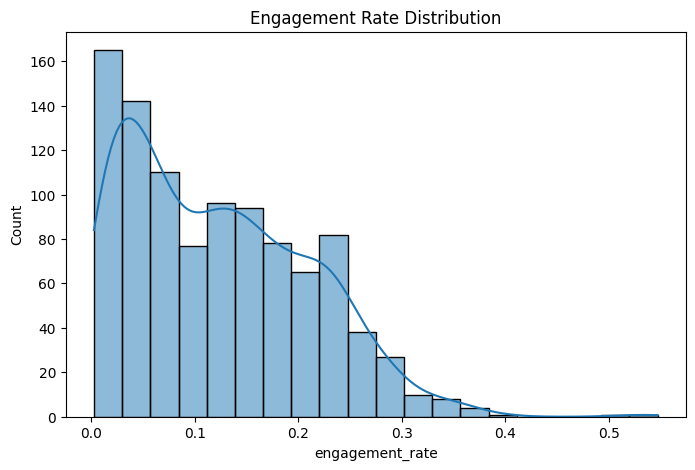

musicMeta.musicName
original sound                                     448
sonido original                                     16
Love You So                                         16
Originalton                                         16
Goddamn Jimmy this is some serious gourmet shit     14
nhạc nền - WorkShop DIY                             10
nhạc nền - fyp                                       9
som original                                         9
Shake It To The Max (FLY) (Remix)                    9
Nope your too late i already died                    9
Name: count, dtype: int64


In [141]:
# Engagement distribution
plt.figure(figsize=(8,5))
sns.histplot(df['engagement_rate'], bins=20, kde=True)
plt.title("Engagement Rate Distribution")
plt.show()

# Top music used
print(df['musicMeta.musicName'].value_counts().head(10))

## Bivariate Analysis

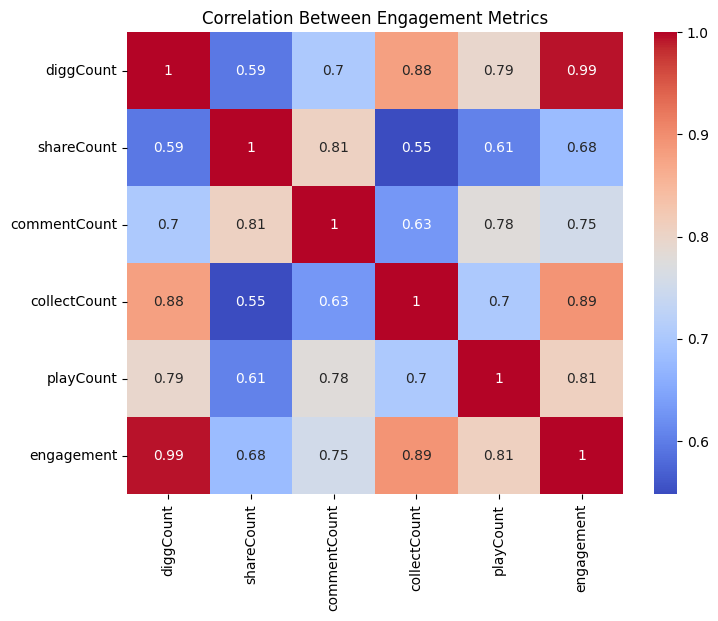

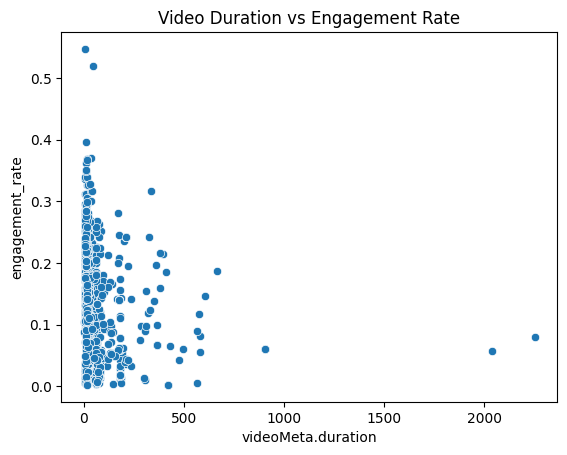

In [142]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['diggCount','shareCount','commentCount','collectCount','playCount','engagement']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Engagement Metrics")
plt.show()

# Engagement vs video duration
sns.scatterplot(x="videoMeta.duration", y="engagement_rate", data=df)
plt.title("Video Duration vs Engagement Rate")
plt.show()

## Trend / Time Analysis

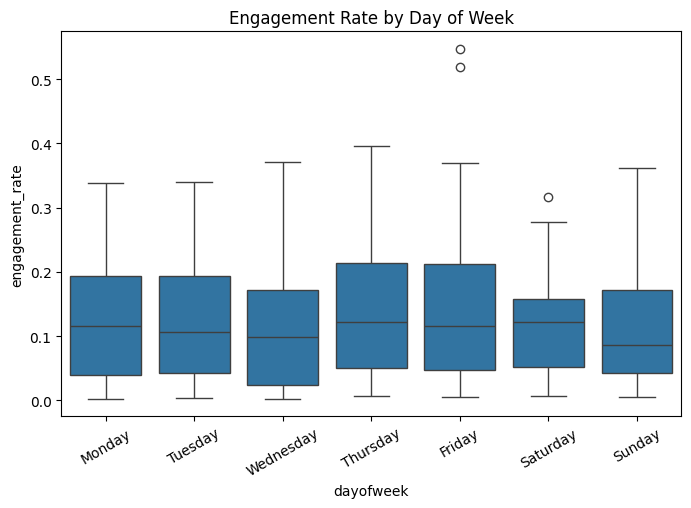

In [143]:
# Engagement by day of week
plt.figure(figsize=(8,5))
sns.boxplot(x="dayofweek", y="engagement_rate", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=30)
plt.title("Engagement Rate by Day of Week")
plt.show()

/tmp/ipython-input-3432193851.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: short_label(g.iloc[0]))
/tmp/ipython-input-3432193851.py:87: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3432193851.py:87: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3432193851.py:87: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129392 (\N{SMILING FACE WITH

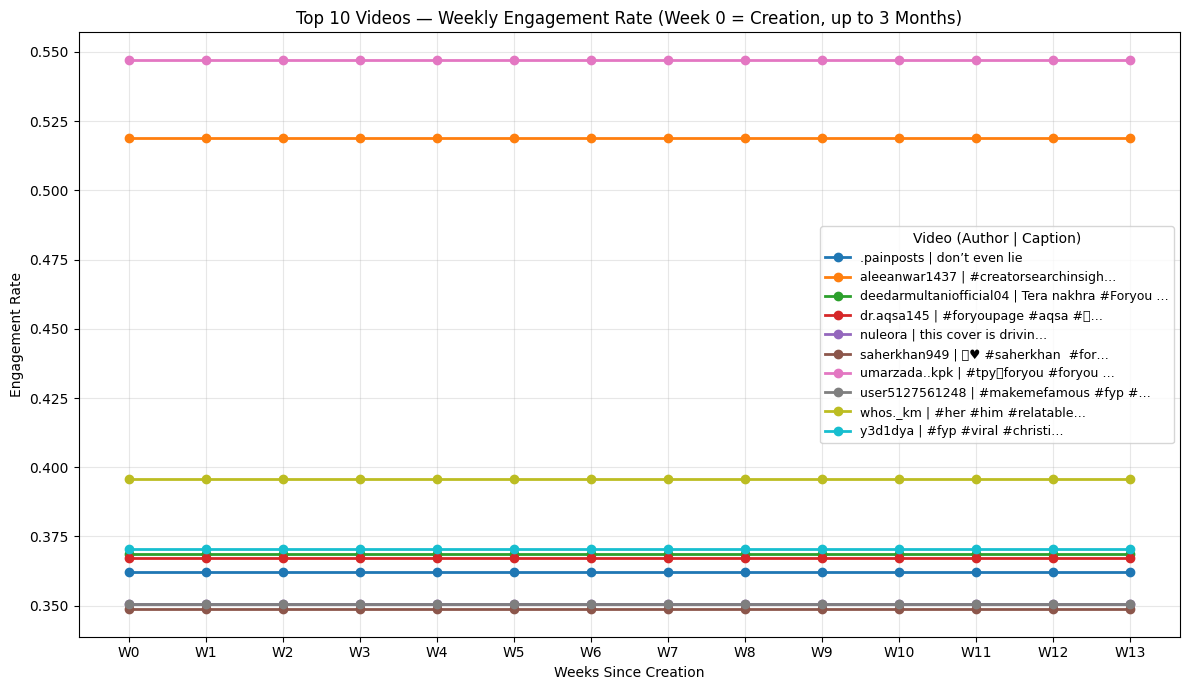

In [144]:
# If you have a scrape timestamp column, use it; else fallback to now (not ideal for historical)
# Prefer something like df["scraped_at"] if available
if "scraped_at" in df.columns:
    df["scraped_at"] = pd.to_datetime(df["scraped_at"], errors="coerce", utc=True)
else:
    # If absent, assume each row's observation time is the same as create time (best-effort fallback)
    df["scraped_at"] = df["createTimeISO"]

# Only keep observations up to 13 weeks (≈ 3 months) after creation
age_days = (df["scraped_at"] - df["createTimeISO"]).dt.total_seconds() / (24*3600)
df["week_since_create"] = np.floor(age_days / 7.0).astype("Int64")

df = df[(df["week_since_create"] >= 0) & (df["week_since_create"] <= 13)].copy()

# Pick, per video per week, the latest observation (max scraped_at) to represent that week's point
df_wk = (
    df.sort_values(["webVideoUrl","week_since_create","scraped_at"])
      .groupby(["webVideoUrl","week_since_create"], as_index=False)
      .tail(1)
)

# Compute a per-video peak engagement rate within the window to rank top 10
peak = (df_wk.groupby("webVideoUrl", as_index=False)["engagement_rate"]
            .max()
            .rename(columns={"engagement_rate": "peak_engagement_rate"}))

top10_ids = (
    peak.sort_values("peak_engagement_rate", ascending=False)
        .head(10)["webVideoUrl"]
        .tolist()
)

df_top = df_wk[df_wk["webVideoUrl"].isin(top10_ids)].copy()

# Add nice labels (author + first 20 chars of caption or last 6 of URL)
def short_label(row):
    base = str(row.get("authorMeta.name") or "")
    cap = str(row.get("text") or "").strip().replace("\n"," ")
    if cap:
        cap = (cap[:20] + "…") if len(cap) > 20 else cap
    else:
        # fallback to ID tail
        vid = str(row.get("webVideoUrl") or "")
        cap = vid[-6:] if len(vid) >= 6 else vid
    return f"{base} | {cap}"

# We'll compute one label per video id
label_map = (df_top.sort_values("scraped_at")
                 .groupby("webVideoUrl")
                 .apply(lambda g: short_label(g.iloc[0]))
                 .to_dict())

df_top["series_label"] = df_top["webVideoUrl"].map(label_map)

# Ensure every series has weeks 0..13 (forward-fill to draw continuous lines)
all_weeks = pd.Index(range(0, 14), name="week_since_create")
filled = []
for vid, g in df_top.groupby("webVideoUrl"):
    g = g.set_index("week_since_create").sort_index()
    g = g.reindex(all_weeks)
    # carry forward engagement_rate if you want continuous lines;
    # alternatively leave gaps if no observation that week
    g["engagement_rate"] = g["engagement_rate"].ffill()
    # carry label/id
    g["webVideoUrl"] = vid
    g["series_label"] = label_map.get(vid, vid[-6:])
    filled.append(g.reset_index())

df_top_full = pd.concat(filled, ignore_index=True)

# -------------------------------------
# 4) Plot: 10 lines, weekly, 0..13 weeks
# -------------------------------------
plt.figure(figsize=(12, 7))

for label, g in df_top_full.groupby("series_label"):
    # x = week_since_create (0..13), y = engagement_rate
    # Matplotlib will automatically cycle colors; we won't set specific colors.
    plt.plot(g["week_since_create"], g["engagement_rate"], marker="o", linewidth=2, label=label)

plt.title("Top 10 Videos — Weekly Engagement Rate (Week 0 = Creation, up to 3 Months)")
plt.xlabel("Weeks Since Creation")
plt.ylabel("Engagement Rate")
plt.xticks(ticks=range(0, 14), labels=[f"W{k}" for k in range(0, 14)])
plt.grid(True, alpha=0.3)
plt.legend(title="Video (Author | Caption)", loc="best", fontsize=9)
plt.tight_layout()
plt.show()

# Preparing for Dashboards

Later, this can be piped into Streamlit / Dash / PowerBI.

In [145]:
# Save processed dataset
df.to_csv("tiktok_processed.csv", index=False)

# Summary stats for dashboard
summary = {
    "avg_engagement_rate": df['engagement_rate'].mean(),
    "top_music": df['musicMeta.musicName'].mode()[0],
    "most_active_day": df['dayofweek'].mode()[0],
    "avg_video_duration": df['videoMeta.duration'].mean()
}
print(summary)

{'avg_engagement_rate': np.float64(0.1219998720395413), 'top_music': 'original sound', 'most_active_day': 'Friday', 'avg_video_duration': np.float64(70.22122122122123)}


# Conclusions

<u>Use Cases:</u>
* Persona building: identify creator clusters by style + engagement profile.
* Trend insights: detect rising hashtags, music, and formats.
* Marketing/Ads: benchmark engagement vs. cost per click/lead/impression for campaign planning.